# Homework 03 Till Meineke

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, root_mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

## Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task.

In [2]:
URL = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
df = pd.read_csv(URL)
df.shape

(11914, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Features

For the rest of the homework, you'll need to use only these columns:

    Make,
    Model,
    Year,
    Engine HP,
    Engine Cylinders,
    Transmission Type,
    Vehicle Style,
    highway MPG,
    city mpg,
    MSRP


## Data preparation

* Select only the features from above and transform their names using the next line:
```
data.columns = data.columns.str.replace(' ', '_').str.lower()
```

In [5]:
columns = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP",
]

data = df[columns]
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head(2)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650


In [6]:
data.nunique()

make                   48
model                 915
year                   28
engine_hp             356
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
msrp                 6049
dtype: int64

In [7]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

* Fill in the missing values of the selected features with 0.

In [8]:
df = data.copy()
df = df.fillna(0)
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

* Rename `MSRP` variable to `price`.

In [9]:
new_name = {"msrp": "price"}

df = df.rename(columns=new_name)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

## Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [10]:
df.describe(include="O")

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


In [11]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [12]:
print(
    f"The most frequent observation (mode) for the 'transmission_type' column is: "
    + str(df["transmission_type"].mode()[0])
)

The most frequent observation (mode) for the 'transmission_type' column is: AUTOMATIC


## Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

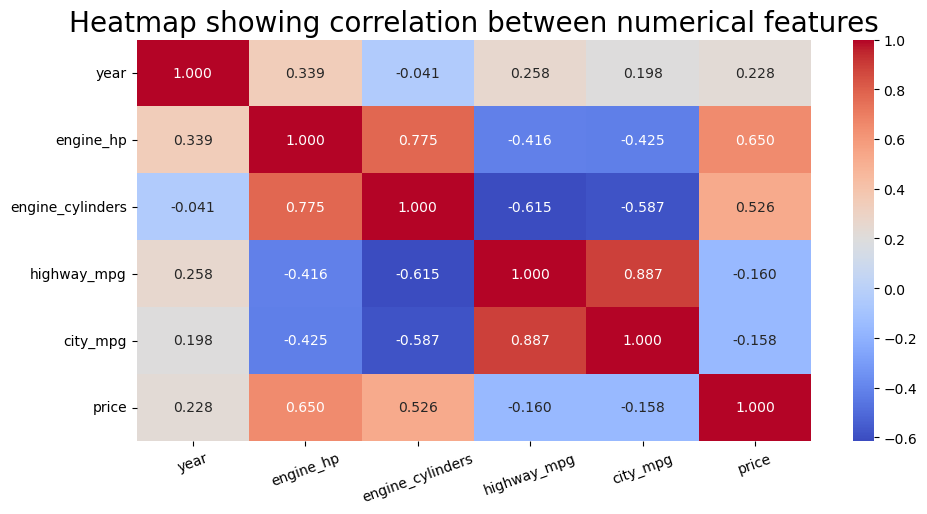

In [13]:
numerical_feat = [
    "year",
    "engine_hp",
    "engine_cylinders",
    "highway_mpg",
    "city_mpg",
    "price",
]

corr = df[numerical_feat].corr()
# plot as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("Heatmap showing correlation between numerical features", fontsize=20)
plt.show();

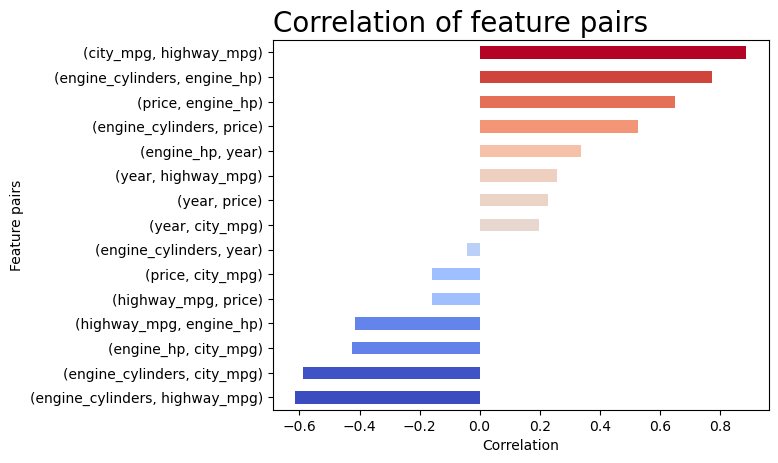

In [14]:
corr2 = (
    df[numerical_feat].corr().unstack().sort_values(ascending=True).drop_duplicates()
)
# drop year year correlation
corr2 = corr2.drop(corr2.index[-1])

# Normalize the correlation values to range [0, 1]
norm = plt.Normalize(vmin=corr2.min(), vmax=corr2.max())
# Choose a colormap, e.g., coolwarm
cmap = plt.get_cmap("coolwarm")
# Generate colors based on the normalized correlation values
colors = cmap(norm(corr2.values))
# Plot the bar chart with the colormap
corr2.plot(kind="barh", color=colors)
plt.title("Correlation of feature pairs", loc="left", fontsize=20)
plt.xlabel("Correlation")
plt.ylabel("Feature pairs")
plt.show();

What are the two features that have the biggest correlation in this dataset?

In [15]:
print(
    f"""The two features that have the biggest correlation
in this dataset are:

{corr2.index[-1][1]} and {corr2.index[-1][0]}"""
)

The two features that have the biggest correlation
in this dataset are:

highway_mpg and city_mpg


##  Make price binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [16]:
df["price"].mean().round(2)

40594.74

In [17]:
data_class = df.copy()
mean = data_class["price"].mean()

data_class["above_average"] = np.where(data_class["price"] >= mean, 1, 0)
data_class = data_class.drop("price", axis=1)
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [18]:
# df["above_average"] = (df["price"] > df["price"].mean()).astype(int)
# df = df.drop(columns=["price"])
# df.info()

## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.

In [19]:
SEED = 42

df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == len(df_train) + len(df_val) + len(df_test)

print(f"Size of the training set:\t {len(df_train)}")
print(f"Size of the validation set:\t {len(df_val)}")
print(f"Size of the test set:\t\t {len(df_test)}")

Size of the training set:	 7148
Size of the validation set:	 2383
Size of the test set:		 2383


In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["above_average"].values
y_val = df_val["above_average"].values
y_test = df_test["above_average"].values

## Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset.
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?

In [21]:
def calculate_mi(series):
    return mutual_info_score(series, df_train["above_average"])

cat = ["make", "model", "transmission_type", "vehicle_style"]

df_mi = df_train[cat].apply(calculate_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")

display(df_mi)

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [22]:
print(f"""The variable with the lowest mutual information score is: {df_mi.iloc[-1].name.replace("_", " ").capitalize()}
with a MI score of: {df_mi.iloc[-1].values[0]}""")

The variable with the lowest mutual information score is: Transmission type
with a MI score of: 0.02


* Make sure that the target value (`above_average`) is not in your dataframe.

In [23]:
df_train = df_train.drop("above_average", axis=1)
df_val = df_val.drop("above_average", axis=1)
df_test = df_test.drop("above_average", axis=1)

assert "above_average" not in df_train.columns
assert "above_average" not in df_val.columns
assert "above_average" not in df_test.columns

## Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

In [24]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

* Fit the model on the training dataset.
  * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  * `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`

In [25]:
model = LogisticRegression(solver="liblinear", max_iter=1000, C=10, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [26]:
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [27]:
accuracy = np.round(accuracy_score(y_val, y_pred), 2)


What accuracy did you get?

In [28]:
print(f"Accuracy = {accuracy}")

Accuracy = 0.94


## Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

In [29]:
features = df_train.columns.to_list()
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [30]:
original_score = accuracy
scores = pd.DataFrame(columns=["eliminated_feature", "accuracy", "difference"])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient="records")
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(
        solver="liblinear", max_iter=1000, C=10, random_state=SEED
    )
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient="records")
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [31]:
scores

,eliminated_feature,accuracy,difference
0,make,0.945027,-0.005027
1,model,0.924045,0.015955
2,year,0.946706,-0.006706
3,engine_hp,0.923626,0.016374
4,engine_cylinders,0.947125,-0.007125
5,transmission_type,0.945867,-0.005867
6,vehicle_style,0.939572,0.000428
7,highway_mpg,0.947125,-0.007125
8,city_mpg,0.945867,-0.005867


In [32]:
scores = scores.sort_values(by="difference", ascending=False)
scores

,eliminated_feature,accuracy,difference
3,engine_hp,0.923626,0.016374
1,model,0.924045,0.015955
6,vehicle_style,0.939572,0.000428
0,make,0.945027,-0.005027
5,transmission_type,0.945867,-0.005867
8,city_mpg,0.945867,-0.005867
2,year,0.946706,-0.006706
4,engine_cylinders,0.947125,-0.007125
7,highway_mpg,0.947125,-0.007125


* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

* `year`
* `engine_hp`
* `transmission_type`
* `city_mpg`

> **Note**: the difference doesn't have to be positive

In [33]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
4,engine_cylinders,0.947125,-0.007125
7,highway_mpg,0.947125,-0.007125


`year` and `engine_cylinders` have the smallest difference and are the least useful features.

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.

In [34]:
df["price"] = np.log1p(df["price"])

In [35]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)


In [36]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [38]:
df_train = df_train.drop("price", axis=1)
df_val = df_val.drop("price", axis=1)
df_test = df_test.drop("price", axis=1)

assert "price" not in df_train.columns
assert "price" not in df_val.columns
assert "price" not in df_test.columns

In [39]:
y_train.shape, y_val.shape

((7148,), (2383,))

In [40]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

In [41]:
import warnings
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:

    warnings.filterwarnings("ignore")

    model = Ridge(alpha=alpha, solver="sag", random_state=SEED, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = root_mean_squared_error(y_val, y_pred)
    scores[alpha] = round(score, 3)
    print(f"alpha = {alpha}:\t RMSE = {score}")

scores

alpha = 0:	 RMSE = 0.4867943132423886
alpha = 0.01:	 RMSE = 0.48679455192752613
alpha = 0.1:	 RMSE = 0.4867967000189975
alpha = 1:	 RMSE = 0.4868181745432738
alpha = 10:	 RMSE = 0.4870322832975126


{0: 0.487, 0.01: 0.487, 0.1: 0.487, 1: 0.487, 10: 0.487}


Which of these alphas leads to the best RMSE on the validation set?

> **Note**: If there are multiple options, select the smallest `alpha`.

In [42]:
print(f"""The `alpha` value of {min(scores, key=scores.get)} \
leads to the best RMSE (= {scores[min(scores, key=scores.get)]})
of the validation set and is the smallest 'alpha'.""")

The `alpha` value of 0 leads to the best RMSE (= 0.487)
of the validation set and is the smallest 'alpha'.


In [44]:
import time
import numpy as np

np.random.seed(42)
a = np.random.uniform(size=(300, 300))
runtimes = 10

timecosts = []
for _ in range(runtimes):
    s_time = time.time()
    for i in range(100):
        a += 1
        np.linalg.svd(a)
    timecosts.append(time.time() - s_time)

print(f"mean of {runtimes} runs: {np.mean(timecosts):.5f}s")

mean of 10 runs: 4.45142s
